## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
data = pd.read_csv('/datasets/data.csv')
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


In [4]:
print(data.describe())

           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949901      0.000000      0.000000   
25%        0.000000   -2747.423625     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt  total_income  
count      21525.000000  21525.000000  1.935100e+04  
mean           0.972544      0.080883  1.674223e+05  
std            1.420324      0.272661  1.029716e+05  
min            0.000000      0.000000  2.066726e+04  
25%            0.000000      0.000000  1.030532e+05  
50%            0.000000      0.000000  1.450179e+05  
75%            1.000000    

### Вывод

**Столбец 'days_employed' – "Общий трудовой стаж"**
1. Есть отрицательные значения. 
2. Тип данных в этом столбце float64, думаю для сокращения размеров таблицы, количество дней стажа можно перевести в int.
3. Есть пропуски данных в этом столбце.
4. Есть выбросы, аномально высокие значения.

**Столбец 'dob_years' – "Возраст заёмщика"**
1. Есть значения меньше 18, есть отрицательные значения.

**Столбец 'education' – "Уровень образования клиента"**
1. В некоторых строках образование пишется с большой строки, в других в верхнем регистре, в третьих в нижнем. Нужно выровнять.

**Столбец 'total_income' – "Ежемесячный доход"**
1. Есть пропуски данных в этом столбце.
2. Тип данных в этом столбце float64, думаю для сокращения размеров таблицы, количество дней стажа можно перевести в int.

**Столбец 'purpose' – "Цель получения кредита"**
1. Есть несколько значений обозначающих одно и то же, например: 'на проведение свадьбы' и 'сыграть свадьбу'.

Столбцы family_status, income_type нужно проверить на уникальность, чтобы не было нескольких значений обозначающих одно и тоже.

### Шаг 2. Предобработка данных

### Обработка пропусков

In [5]:
#Посмотрим строки с пропуском в столбце days_employed
data[data['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [6]:
#Посмотрим строки с пропуском в столбце total_income
data[data['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Значение в столбцах days_employed и total_income пропущены в одних а тех же строках, вряд ли это случайность. 

In [7]:
#Посмотрим кто эти люди по жизни
print(data[data['total_income'].isna()]['income_type'].value_counts())

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64


Может быть инфа о доходе и опыте работы сотрудников и компаньонов подтягивается  из какой-то базы, но что-то сбойнуло и данные не подтягивались.

Возможно некоторым госслужащим нельзя показывать доход, чтобы не попать в очередной выпуск передачи Навального.

У пенсионеров может не быть дохода, поэтому значения пропущены.
Предпринимателей всего 2, один из них не указал доход, деньги любят тишину.

In [8]:
#Отрицательные значения переводим в положительные
data['days_employed'] = data['days_employed'].abs()
data['children'] = data['children'].abs()
print(data.head(5))

   children  days_employed  dob_years education  education_id  \
0         1    8437.673028         42    высшее             0   
1         1    4024.803754         36   среднее             1   
2         0    5623.422610         33   Среднее             1   
3         3    4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жи

In [9]:
#Найдём медианный заработок для всех типов занятости, просто играюсь с данными, в зачёт не идёт
sotrudnik_median_income = data[data['income_type'] == 'сотрудник']['total_income'].abs().median()
kompanon_median_income = data[data['income_type'] == 'компаньон']['total_income'].median()
pensioner_median_income = data[data['income_type'] == 'пенсионер']['total_income'].median()
gosslugba_median_income = data[data['income_type'] == 'госслужащий']['total_income'].median()
predprenimatel_median_income = data[data['income_type'] == 'предприниматель']['total_income'].median()

print(sotrudnik_median_income)
print(kompanon_median_income)
print(pensioner_median_income)
print(gosslugba_median_income)
print(predprenimatel_median_income)
print()
print(data['days_employed'].median())
print(data['total_income'].median())
print()
print(data['days_employed'].mean())
print(data['total_income'].mean())

142594.39684740017
172357.95096577113
118514.48641164352
150447.9352830068
499163.1449470857

2194.220566878695
145017.93753253992

66914.72890682236
167422.30220817294


Мне кажется заполнить пропущенный данные в обоих столбцах медианами хорошее решение. Т.к. среднее значение из-за выбросов получается не корректным.

Столько строк я написал исключительно из интереса.

In [10]:
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())
print(data['days_employed'].isna().sum())
data

0


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [11]:
data['total_income'] = data['total_income'].fillna(data['total_income'].median())
print(data['total_income'].isna().sum())
data

0


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


# Вывод

У нас есть 2 столбца в которых замечены пропуски days_employed и total_income.

Во всех строках с пропусками, отсутствуют значения сразу в двух столбцах. Значит это не случайность.

Больше всего пропусков строках с сотрудиками, возможно данные подтягиваются из какой-то базы данных автоматически и из-за сбоя возникли пропуски.

Все пропуски были заполнены медианами по соответствующему столбцу. Я применил медиану, потому что в столбцах days_employed и total_income есть выбросы и среднее значение расчитывается некорректно.

### Замена типа данных

In [12]:
#Меняем вещественный тип данных на целочисленный
data['days_employed'] = data['days_employed'].astype('int64')
data['total_income'] = data['total_income'].astype('int64')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB
None


### Вывод

Всё сработало, данные из флоат переведены в интежер.

Мы проходили два метода для смены типа данных. to_numeric() и astype(), нумерик переводит все числа в формат float, 
его можно было бы применить, если значения хранились в формате строки.

У нас значения в столбцах days_employed и total_income и так хранятся во флоат, 
нам нужно перевести в интежер, поэтому я применил astype().

### Обработка дубликатов

In [13]:
#Приводим все строковые значения к нижнему регистру
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['gender'] = data['gender'].str.lower()
data['income_type'] = data['income_type'].str.lower()
data['purpose'] = data['purpose'].str.lower()
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,среднее,1,гражданский брак,1,f,компаньон,0,224791,операции с жильем
21521,0,343937,67,среднее,1,женат / замужем,0,f,пенсионер,0,155999,сделка с автомобилем
21522,1,2113,38,среднее,1,гражданский брак,1,m,сотрудник,1,89672,недвижимость
21523,3,3112,38,среднее,1,женат / замужем,0,m,сотрудник,1,244093,на покупку своего автомобиля


In [14]:
#Количество дубликатов с датафреймом у которого категоризированы цели кредита
print('Количество дубликатов с датафреймом которых указаны цели кредита: ',data[data.duplicated()]['income_type'].value_counts().sum())
print('Количество дубликатов с датафреймом без цели кредита: ', data.loc[:, 'children': 'total_income'].duplicated().sum())

Количество дубликатов с датафреймом которых указаны цели кредита:  71
Количество дубликатов с датафреймом без цели кредита:  747


In [15]:
#Удаляем дубликаты, проверяем, что всё почистилось
data = data.drop_duplicates().reset_index(drop
= True)
print(data.duplicated().sum())

0


Интересно получается, когда мы искали дубликаты исключая из датафрейма последний столбец 'purpose — цель получения кредита', то дубликатов был 648, а когда мы категоризовали 'purpose', дубликатов получилось меньше – 546.

Совпадение? Не думаю!

### Лемматизация

In [16]:
from pymystem3 import Mystem
m = Mystem()

In [17]:
def lemm_function(data):
    words = ' '.join(m.lemmatize(data))
    return words
    
purpose_lemm = data['purpose'].apply(lemm_function)
print(len(purpose_lemm)) #проверяю соответствует ли количество строк, количеству в исходном датасете, 
#прям не верится, что это так круто работает))

21454


In [18]:

def lemm_categoryzator(row):
    if 'свадьба' in row:
        return 'свадьба'
        
    if 'автомобиль' in row:
        return 'автомобиль'
    
    if 'жилье' or 'недвижимость' in row:
        return 'недвижимость'
    
    if 'образование' in row:
        return 'образование'
    
purpose_lemm_final = purpose_lemm.apply(lemm_categoryzator)
print(purpose_lemm_final.value_counts())

недвижимость    14824
автомобиль       4306
свадьба          2324
Name: purpose, dtype: int64


In [19]:
#Заменяем столбец в датасете
data['purpose'] = purpose_lemm_final
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,недвижимость
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,среднее,1,гражданский брак,1,f,компаньон,0,224791,недвижимость
21450,0,343937,67,среднее,1,женат / замужем,0,f,пенсионер,0,155999,автомобиль
21451,1,2113,38,среднее,1,гражданский брак,1,m,сотрудник,1,89672,недвижимость
21452,3,3112,38,среднее,1,женат / замужем,0,m,сотрудник,1,244093,автомобиль


### Вывод

Разные люди имея в виду одну и ту же цель получения кредита, называют её по разному. Поэтому я при помощи лемматизации выделил основные категории:

недвижимость,
автомобиль, 
свадьба.

### Категоризация данных

In [20]:
#Распределю месячные доходы по категориям
def income_categoryzator(row):
    income = row['total_income']
    if income < 50000:
        return 'менее 50к'
        
    if 50000 < income <= 100000:
        return 'от 50к до 100к'
    
    if 100000 < income <= 150000:
        return 'от 100к до 150к'
    
    if 150000 < income <= 200000:
        return 'от 150к до 200к'    
    
    if 200000 < income <= 300000:
        return 'от 200к до 300к'
    
    if income > 300000:
        return 'свыше 300к'
    
income_category = data.apply(income_categoryzator, axis = 1)
print(income_category.value_counts())

от 100к до 150к    7807
от 150к до 200к    4118
от 50к до 100к     4091
от 200к до 300к    3584
свыше 300к         1482
менее 50к           372
dtype: int64


In [21]:
#Добавляем столбц с категориями дохода в датасет
data['income_category'] = income_category
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,недвижимость,от 200к до 300к
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,автомобиль,от 100к до 150к
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,недвижимость,от 100к до 150к
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,недвижимость,от 200к до 300к
4,0,340266,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,свадьба,от 150к до 200к
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,среднее,1,гражданский брак,1,f,компаньон,0,224791,недвижимость,от 200к до 300к
21450,0,343937,67,среднее,1,женат / замужем,0,f,пенсионер,0,155999,автомобиль,от 150к до 200к
21451,1,2113,38,среднее,1,гражданский брак,1,m,сотрудник,1,89672,недвижимость,от 50к до 100к
21452,3,3112,38,среднее,1,женат / замужем,0,m,сотрудник,1,244093,автомобиль,от 200к до 300к


### Вывод

У нас теперь есть 6 категорий ежемесячного дохода.

от 100к до 150к    7332
от 150к до 200к    4118
от 50к до 100к     4091
от 200к до 300к    3584
свыше 300к         1482
менее 50к           372

У большинства доход в пределах 100 – 150к.
Я разделил доход по категориям, чтобы ответить на вопрос "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?"

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [22]:
data_pivot = data.pivot_table(index='children', columns='debt', values='gender', aggfunc='count')

def sum(row):
    sum = 0
    sum = row[0] + row[1]
    return sum

data_pivot['sum'] = data_pivot.apply(sum, axis = 1)
data_pivot['dept_percent'] = data_pivot[1] / data_pivot['sum'] * 100
data_pivot

debt,0,1,sum,dept_percent
children,,,,
0,13028.0,1063.0,14091.0,7.543822
1,4410.0,445.0,4855.0,9.165808
2,1858.0,194.0,2052.0,9.454191
3,303.0,27.0,330.0,8.181818
4,37.0,4.0,41.0,9.756098
5,9.0,NaN,NaN,NaN
20,68.0,8.0,76.0,10.526316


### Вывод

Чем больше детей, тем больше вероятность, что у клиента будет задолженность.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [23]:
data_pivot = data.pivot_table(index='family_status', columns='debt', values='gender', aggfunc='count')

#Объявлю функцию, которая будет суммировать столбцы
def sum(row):
    sum = 0
    sum = row[0] + row[1]
    return sum

data_pivot['sum'] = data_pivot.apply(sum, axis = 1)
data_pivot['dept_percent'] = data_pivot[1] / data_pivot['sum'] * 100 #вычисляем процент просроченых кредитов
data_pivot

debt,0,1,sum,dept_percent
family_status,,,,
в разводе,1110,85,1195,7.112971
вдовец / вдова,896,63,959,6.569343
гражданский брак,3763,388,4151,9.347145
женат / замужем,11408,931,12339,7.545182
не женат / не замужем,2536,274,2810,9.750890


### Вывод

Самые не надёжные заёмщики, люди которые не были в браке или жувущие в гражданском браке.

Меньше проблем с возвратом кредитов у вдовцов/вдов.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [24]:
data_pivot = data.pivot_table(index='income_category', columns='debt', values='gender', aggfunc='count')

data_pivot['sum'] = data_pivot.apply(sum, axis = 1)
data_pivot['dept_percent'] = data_pivot[1] / data_pivot['sum'] * 100 #вычисляем процент просроченых кредитов
data_pivot

debt,0,1,sum,dept_percent
income_category,,,,
менее 50к,349,23,372,6.182796
от 100к до 150к,7146,661,7807,8.466761
от 150к до 200к,3750,368,4118,8.936377
от 200к до 300к,3332,252,3584,7.031250
от 50к до 100к,3760,331,4091,8.090931
свыше 300к,1376,106,1482,7.152497


### Вывод

Люди с доходом менее 50к лучше отдают кредиты, чем люди с доходом в 300к. Ну они м меньше кредитов берут.

Больше всего проблем с возвратами у людей со средним доходом 100-150к.

- Как разные цели кредита влияют на его возврат в срок?

In [25]:
data_pivot = data.pivot_table(index='purpose', columns='debt', values='gender', aggfunc='count')

data_pivot['sum'] = data_pivot.apply(sum, axis = 1)
data_pivot['dept_percent'] = data_pivot[1] / data_pivot['sum'] * 100 #вычисляем процент просроченых кредитов
data_pivot

debt,0,1,sum,dept_percent
purpose,,,,
автомобиль,3903,403,4306,9.359034
недвижимость,13672,1152,14824,7.771182
свадьба,2138,186,2324,8.003442


### Вывод

Те кто берёт кредит на авто имеют большую вероятность задолжать.

Самые надежные займы на недвижимость. 

Видимо по этому сегодня по радио я раз 20 услышал рекламу ипотеки))

### Шаг 4. Общий вывод

Проанализировав статистику о платёжеспособности клиентов мы обнаружили несколько инсайтов.

1. Одни и те же люди запрашиваю кредит несколько раз на разные цели.
2. Если у клиента нет детей, то его платёжеспособность выше. Количество детей в пределах от 1 до 5 штук, особо не уменьшает платёжеспособность, а вот у экстрималов с 20 детьми риск выше. 
3. Клиенты, которых называют "средним классом" с доходом 100 - 200к, менее платёжеспособны в отличии от клиентов с доходом менее 50к или более 200к.
4. Если клиент берёт кредит на машину или свадьбу, то вероятно, что в будующем у него будут проблемы с возвратом.

5. Больше всего кредитов кредитов берут люди со статусом 'сотрудник', за ними в два раза меньше 'компаньонов'.
6. В 69% случаев (14 824 случаев из 21 454) люди берут кредит на недвижимость.
7. В 57% случаев (12 339 случаев из 21 454) люди которые берут кредит женаты или замужем.
8. В 72% случаев люди взявие кредит не имеют высшего образования.
9. В 66% случаев кредит брали женщины.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.

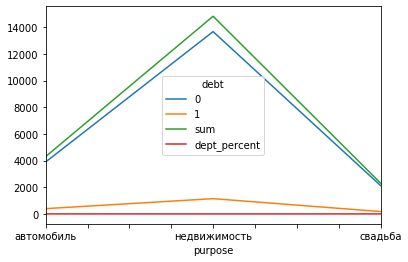

In [27]:
data_pivot.plot()